
#                   Caminata aleatoria                   

En este código, desarrollamos el método  de caminata aleatoria, método usado principalmente para problemas de física estadistica. El código fue desarrollado para como evidencia para el proyecto N.4 de la materia Aplicaciones de la nanotecnología computacional.

email: ricardo.lealpz@gmail.com                         

Fecha:27/10/20

In [1]:
import numpy as np
import math as math
import random as random
import matplotlib.pyplot as plt
from time import time
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
jtplot.style(ticks=True, grid=False, figsize=(15, 7))

In [2]:
#Esta función solo sirve para calcular el tiempo de ejecución del código.
def tiempo_total(tiempo):
	tiempo_calculado=time()
	tiempo_final=(tiempo_calculado-tiempo)
	if (tiempo_final>3600):
		print('El código tardo %s horas en ejecutarse.' % (tiempo_final/3600))
	elif (tiempo_final>60):
		print('El código tardo %s minutos en ejecutarse.' % (tiempo_final/60))
	else:
		print('El código tardo %s segundos en ejecutarse.' % tiempo_final)

#Nos genera dos archivos txt para poder graficar en LaTex y para
#tener las posiciones exactas de nuestro sistema.
def txt(x,y,N):
	t1=open("grafica_caminante.txt","w")

	for i in range(0,N-1):
		t1.write(str(x[i])); t1.write(" "); t1.write(str(y[i]))
		t1.write("\n")

	t1.close()

In [3]:
#Aqui graficaremos los valores para observar las posiciones (x,y).
def grafica(x,y,N):
	plt.figure()
	plt.title('Caminata aleatoria caso (a)')
	plt.xlabel('x')
	plt.ylabel('y')
	#plt.plot(x,y,'r')
	plt.scatter(x,y,color='red',lw=3)
	plt.grid()
	plt.show()

In [4]:
#Aqui graficaremos para r, únicamente.
def graficaR(rprom,NTot):
	x=np.zeros(NTot)
	for i in range(0,NTot):
		x[i]=i
	plt.figure()
	plt.title('Valor promedio de R')
	plt.ylabel('r_prom')
	plt.xlabel('N')
	plt.plot(x,rprom,color='red',lw=2)
	plt.xlim(x[0],x[NTot-1])
	plt.show()

#Esta funcion es para los txt de nuestra R y r.
def txt2(rprom,Rpro,NTot):
	t1=open("rprom.txt","w")
	t2=open("Rpromedio.txt","w")

	for i in range(0,NTot):
		t1.write(str(i)); t1.write(" "); t1.write(str(rprom[i]))
		t1.write("\n")

		t2.write(str(i)); t2.write(" "); t2.write(str(Rpro[i]))
		t2.write("\n")

	t1.close(); t2.close()

In [5]:
#La función esta hecha para generar la posicion de nuestro caminante.
def posicion(N):

	#Generamos dos posiciones, una en x y una en y.
	#Esto lo lograremos creando dos matrices con numpy.
	#Lo hacemos para poder obtener un cambio en las 4 opciones de
	#movimiento que nos ofrecen. Podemos movernos en una malla cuadracular
	#con movimientos permitidos únicamente en números enteros. Podremos movernos
	#en 1 unidad (-1,1) en x o en 1 unidad en y. Solo podra moverse entre esas
	#opciones.
	x=np.zeros(N)
	y=np.zeros(N)

	r=np.zeros(N)

	#Entonces, generamos un numero entero aleatorio que decidira hacia donde se movera.
	
	for i in range(0,N-1):
		if (i==0):
			x[i]=0
			y[i]=0

		#Aqui generamos nuestro numero aleatorio para saber a donde se movera.	
		aleatorio=random.randint(1,4)

		#Esto nos genera v_{1}=(+1,0)
		if (aleatorio==1):

			x[i]=x[i-1]+1
			y[i]=y[i-1]

		#Esto nos genera v_{2}=(0,+1)
		elif (aleatorio==2):

			x[i]=x[i-1]
			y[i]=y[i-1]+1

		#Esto nos genera v_{3}=(-1,0)
		elif (aleatorio==3):

			x[i]=x[i-1]-1
			y[i]=y[i-1]

		#Esto nos genera v_{4}=(0,-1)
		elif (aleatorio==4):

			x[i]=x[i-1]
			y[i]=y[i-1]-1

	#Una vez obtenido todos los pasos de nuestro caminante, calculamos R
	#sabiendo que es la distancia desde el inicio hasta el final.
	r=math.sqrt((x[N-1]-x[0])**2+(y[N-1]-y[0])**2)


	#Ahora, generamos los txt y la grafica con nuestras posiciones en (x,y).
	#texto=txt(x,y,N)
	#graficar=grafica(x,y,N)

	return r

In [6]:
#Esta es la funcion que correra N veces la random walk con el proposito
#de obtener distintos valores promedios que puedan cumplir que R=N y r=\sqrt{N}.
def solucion():
	tiempo=time() #Solo inicilizamos el tiempo para calcularlo despues.

	P=500 #Aqui ponemos la cantidad de pasos inicial a dar en la random walk.
	n=500 #Las veces que repetiremos el proceso para obtener nuestro promedio.
	NTot=20 #Él numero de valores promedio que buscamos.

	#Aqui generamos dos matrices para los valores de nuestra R y r.
	rprom=np.zeros(NTot) #Esta es para r.
	Rpro=np.zeros(NTot)  #Esta es para R.
	rsum=0               #Solo inicializamos una variable.

	#Generamos un ciclo para calcular todos los valores promedio.
	#Iremos variando el numero de pasos para obtener distintos R_{prom}.
	for i in range(0,NTot):
		#Este ciclo es para calcular n veces el valor r con random walk.
		for j in range(0,n):
			r=posicion(P) #Llamamos a la funcion de random walk.
			rsum+=r #Aqui generamos la suma para sacar promedio.

		Rpro[i]=(rsum/n) #Aqui calculamos la R=NTot
		rprom[i]=math.sqrt(Rpro[i]) #Aqui calculamos la r=\sqrt(NTot)

		P+=10 #Aqui aumentamos el num. de pasos en random walk.

		#print("Rprom[{f}]={d}".format(f=i,d=Rpro[i]))

	#Aqui solamente llamamos funciones para generar archivos txt y graficar.
	graficar=graficaR(rprom,NTot)
	#archivos=txt2(rprom,Rpro,NTot)
	tiempo_calculado=tiempo_total(tiempo) #Calculamos el tiempo de ejecucion.

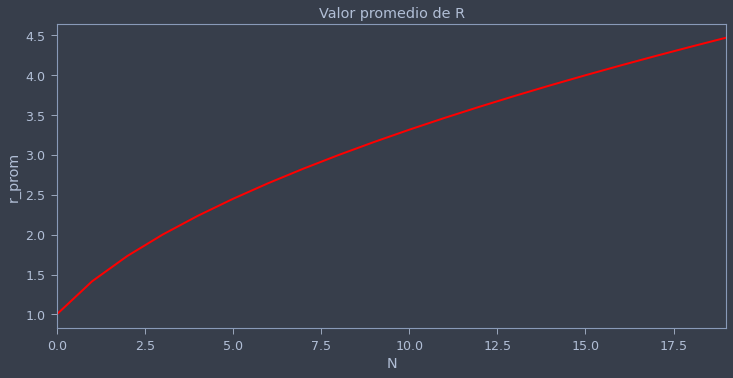

El código tardo 33.83351445198059 segundos en ejecutarse.


In [7]:
#Aqui corremos todo el código.
if ( __name__ == '__main__' ):
	solucion=solucion()